In [62]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

training_data_VT2026 = pd.read_csv('../Training/training_data_VT2026.csv')




In [ ]:
training_data_VT2026.head()




0       0
1       0
2       0
3       0
4       0
       ..
1595    0
1596    0
1597    0
1598    0
1599    0
Name: snow, Length: 1600, dtype: int64


In [ ]:


#copy data
df = training_data_VT2026.copy()




#make months and days of week make sense by making in circular
N1 = 12
df['month_sin'] = np.sin(2 * np.pi * df['month'] / N1)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / N1)
df.drop('month', axis=1)

N2 = 7
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / N2)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / N2)
df.drop('day_of_week', axis=1)

N3 = 24
df['hour_of_the_day_sin'] = np.sin(2* np.pi * df['hour_of_the_day'] / N3)
df['hour_of_the_day_cos'] = np.cos(2* np.pi * df['hour_of_the_day'] / N3)
df.drop('hour_of_the_day', axis=1)

#split into features and target variable
X = df.drop('increase_stock', axis=1)
y = df['increase_stock']
X.head()

print('unika klasser i target variabeln:', y.unique())

for label in y.unique():
    print(f"Kovarians mellan features för klass '{label}':")
    
    # Filtrera rader som tillhör denna klass
    class_data = X[y == label]
    
    # Beräkna kovariansmatris
    cov_matrix = class_data.cov()
    print(cov_matrix)
    print()


snow
0    1600
Name: count, dtype: int64
unika klasser i target variabeln: <StringArray>
['low_bike_demand', 'high_bike_demand']
Length: 2, dtype: str
Kovarians mellan features för klass 'low_bike_demand':
                 hour_of_day  day_of_week      month   holiday   weekday  \
hour_of_day        53.194313    -0.239861  -0.720359  0.030595 -0.052808   
day_of_week        -0.239861     3.984612  -0.375109 -0.036246 -0.684690   
month              -0.720359    -0.375109  12.937471 -0.006084  0.113784   
holiday             0.030595    -0.036246  -0.006084  0.032437  0.008902   
weekday            -0.052808    -0.684690   0.113784  0.008902  0.195038   
summertime         -0.167469    -0.003776   0.080803 -0.012351 -0.000644   
temp                5.266232    -0.615978   7.104700 -0.103824  0.271633   
dew                -4.417939    -0.090043   9.746323 -0.125798  0.204771   
humidity          -37.254165     1.708968  11.471004 -0.078586 -0.109322   
precip              0.041367    -0

In [72]:
snow_stats = df["snow"].value_counts().sort_index()
print(snow_stats)
snowdepth_stats = df["snowdepth"].value_counts().sort_index()
print(snowdepth_stats)
print(df.shape[0])

snow
0    1600
Name: count, dtype: int64
snowdepth
0.00    1542
0.01       2
0.02       2
0.03       5
0.04       1
0.05       3
0.08       1
0.10       5
0.11       2
0.15       1
0.20       2
0.23       1
0.25       1
0.26       1
0.29       1
0.30       4
0.37       1
0.40       2
0.45       1
0.60       1
0.63       1
0.65       1
0.67       1
0.70       1
0.73       1
0.78       1
1.27       1
1.30       1
2.00       1
2.09       1
2.16       1
2.24       1
2.29       1
3.87       1
4.94       1
5.23       1
5.43       1
5.64       1
6.13       1
6.68       1
6.71       1
Name: count, dtype: int64
1600


In [ ]:
#compare covariances between classes
#scale to be able to interpret the results
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X) # this is (x-mean)/std. dont do fit for test data, only transform
#make it a dataframe again to be able to use the cov function
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

head = X_scaled.head()
print(head)

labels = y.unique()
cov1 = X_scaled[y == labels[0]].cov()
cov2 = X_scaled[y == labels[1]].cov()

diff = cov1 - cov2
fro_norm = np.linalg.norm(diff)  # storleken på skillnaden
print(f"Frobeniusnormen av skillnaden mellan {labels[0]} och {labels[1]}: {fro_norm:.2f}")

   hour_of_day  day_of_week     month   holiday   weekday  summertime  \
0    -0.917228     0.982689 -1.583465 -0.185094 -1.564697   -1.344254   
1     1.386190     0.485754 -1.583465 -0.185094  0.639101   -1.344254   
2     1.386190    -0.011181  0.443370 -0.185094  0.639101    0.743907   
3    -1.493083     1.479624 -1.583465 -0.185094 -1.564697   -1.344254   
4     0.810335    -1.501986 -1.004369 -0.185094  0.639101   -1.344254   

       temp       dew  humidity    precip  snow  snowdepth  windspeed  \
0 -2.419627 -2.269781 -0.537283 -0.132609   0.0  -0.101439   0.414935   
1 -1.782607 -2.050293 -1.203654 -0.132609   0.0  -0.101439   1.395045   
2  1.262128  1.401656  0.496090 -0.132609   0.0  -0.101439  -1.687144   
3 -1.307542 -1.172340 -0.219564 -0.132609   0.0  -0.101439   0.788924   
4 -0.379006 -1.910618 -2.370721 -0.132609   0.0  -0.101439  -0.333044   

   cloudcover  visibility  month_sin  month_cos  day_of_week_sin  \
0   -0.999503    0.282338   0.678434   1.227255       

frobeniusnormen är hyfsat stort, vilket tyder på att det finns skillnader i covarianserna mellan de två klasserna. Det kan vara värt att undersöka vilka specifika variabler som bidrar mest till denna skillnad, kanske genom att titta på de enskilda elementen i diff-matrisen.


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


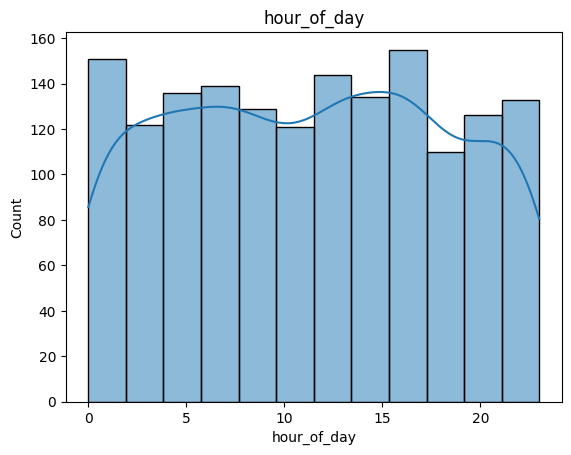

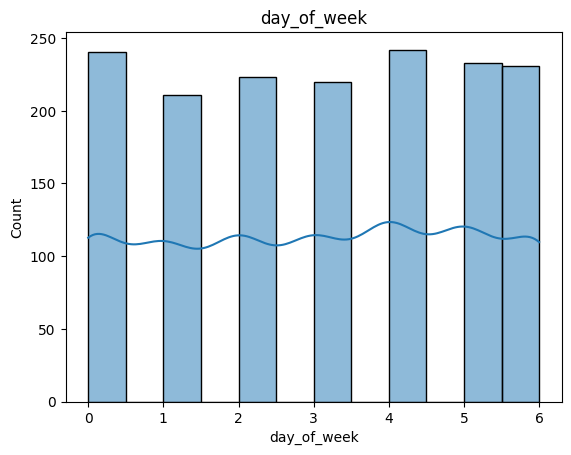

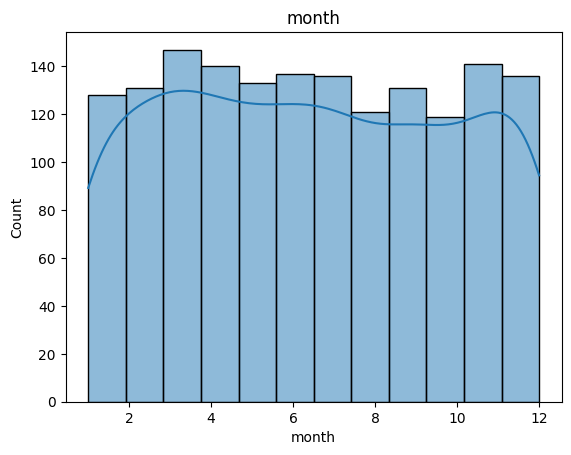

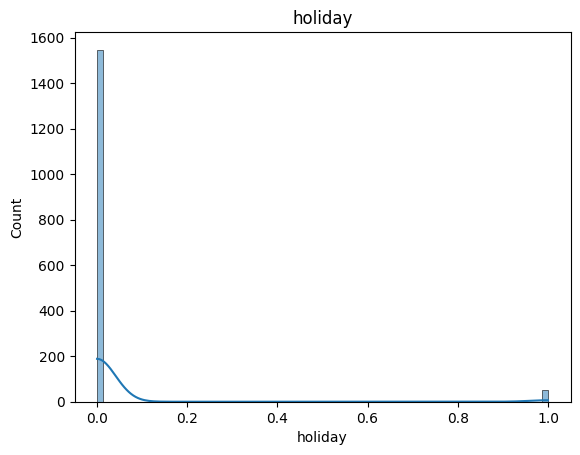

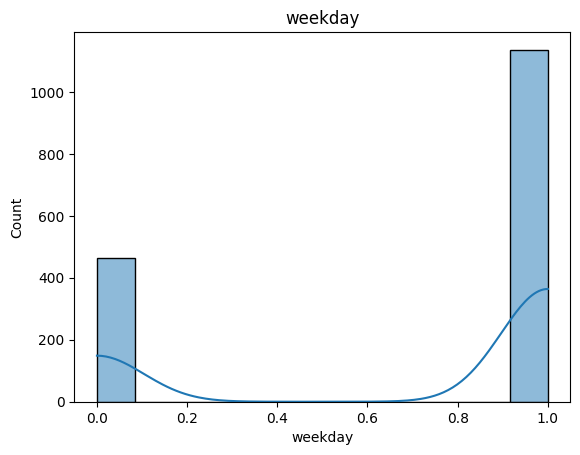

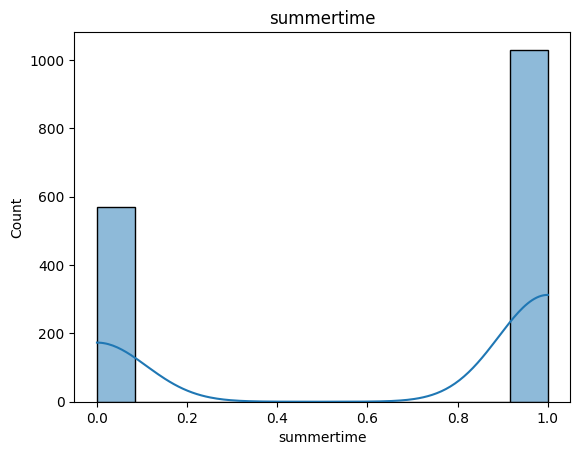

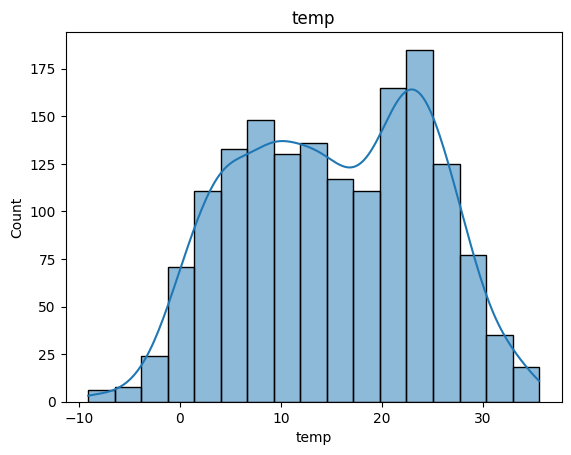

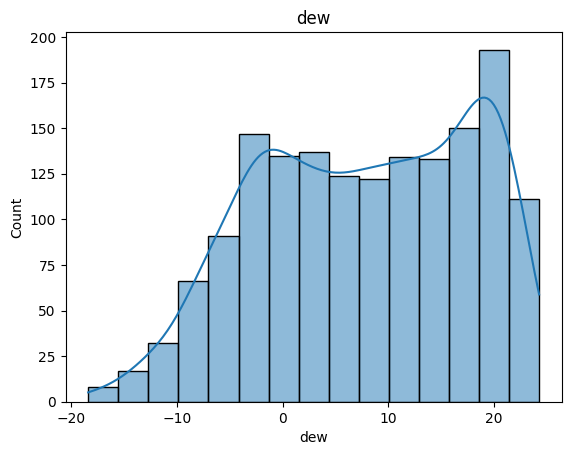

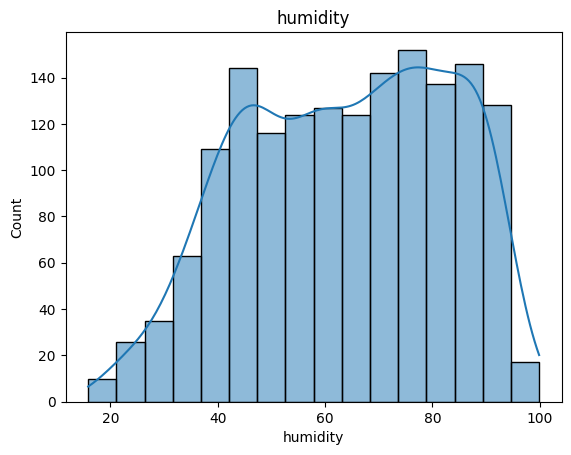

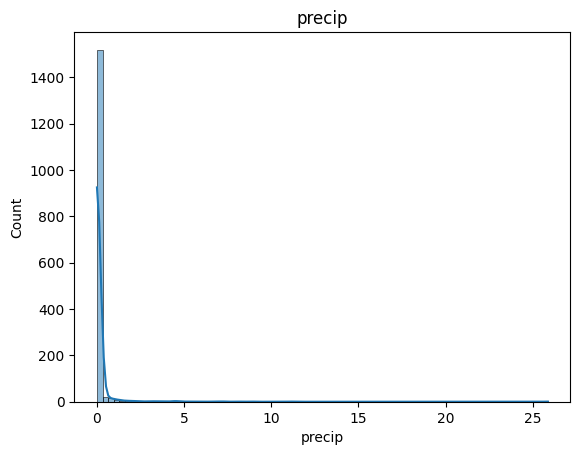

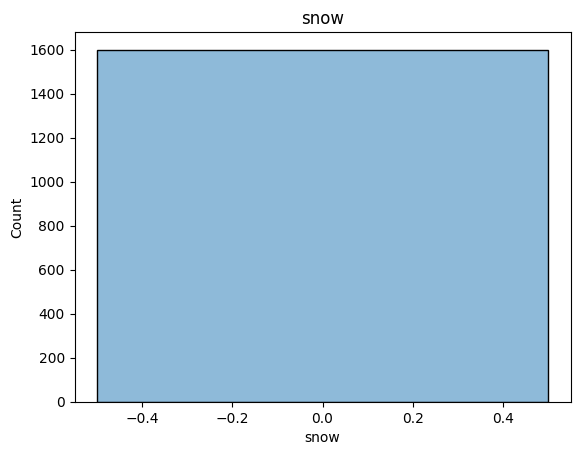

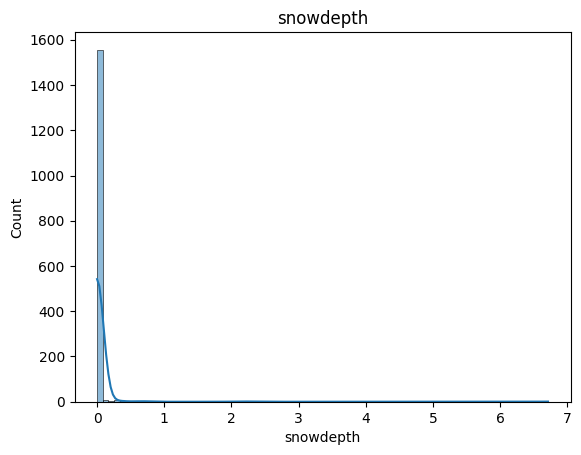

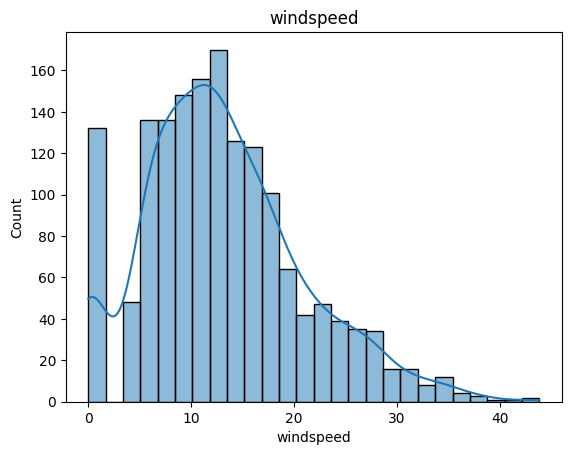

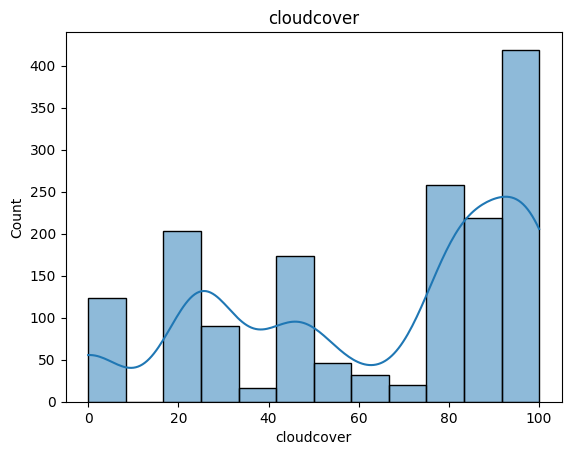

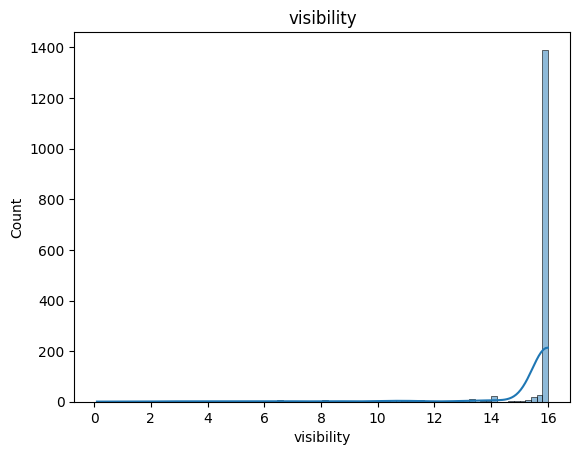

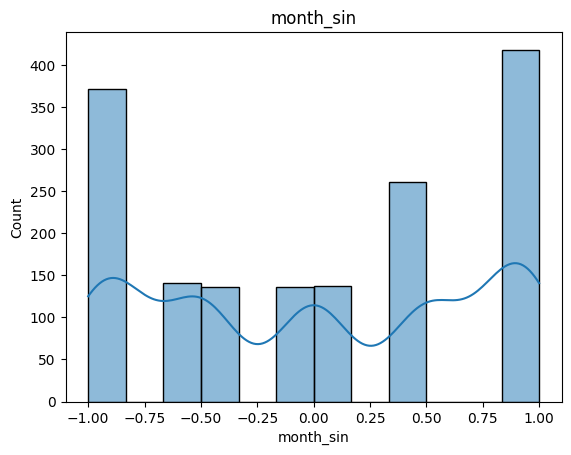

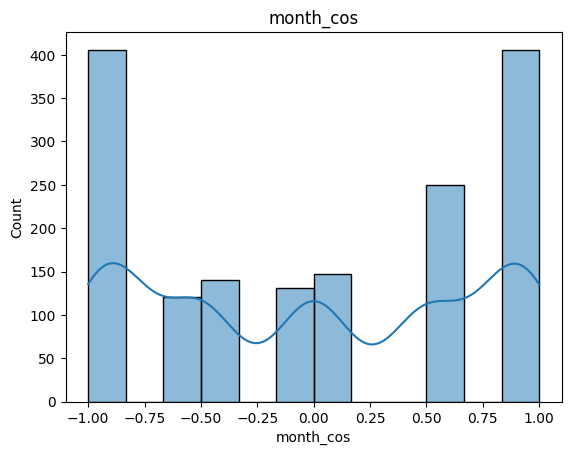

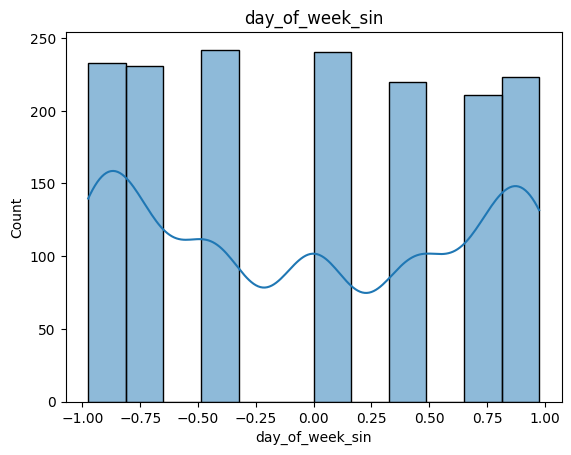

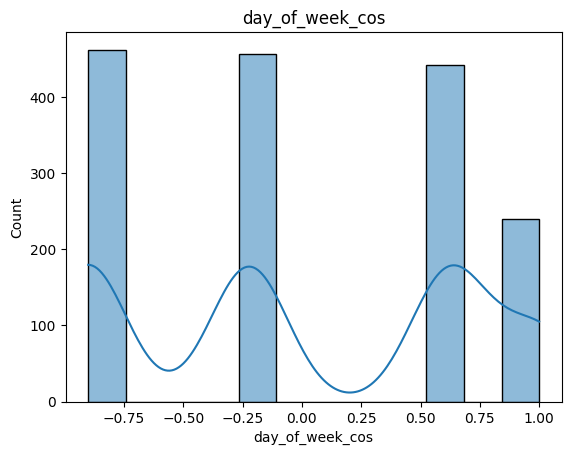

In [59]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

for col in X.columns:
    sns.histplot(X[col], kde=True)
    plt.title(col)
    plt.show()
